## Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Data Collection and Processing

In [2]:
# Loading the csv file to a pandas DataFrame
Insurance_dataset = pd.read_csv('data.csv')

In [3]:
# printing the first five rows of the dataset
Insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# number of rows and columns in the dataset
Insurance_dataset.shape

(1338, 7)

In [5]:
# Getting some info about the dataset
Insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Categorical Features
* Sex
* Smoker
* Region

In [6]:
# Checking for Missing values
Insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data Analysis 

In [7]:
# getting some statistical measures of the dataset
Insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x432 with 0 Axes>

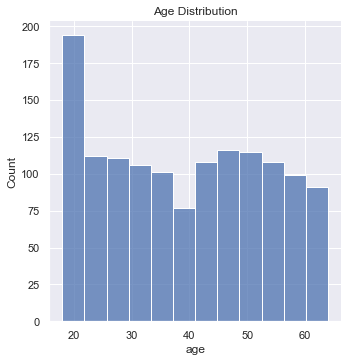

In [8]:
# Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(Insurance_dataset['age'])
plt.title('Age Distribution')
plt.show

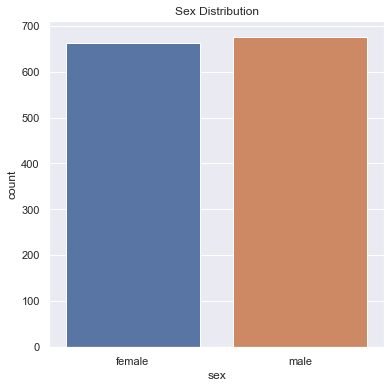

In [9]:
# Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data = Insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [10]:
Insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x432 with 0 Axes>

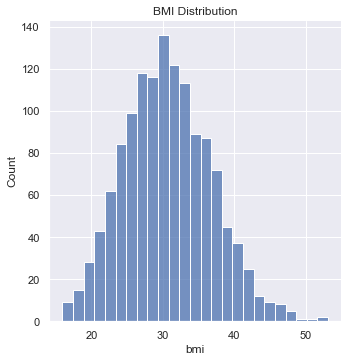

In [11]:
# Checking the bmi distribution 
plt.figure(figsize=(6,6))
sns.displot(Insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show

* Normal BMI Range --> 18.5 to 24.9

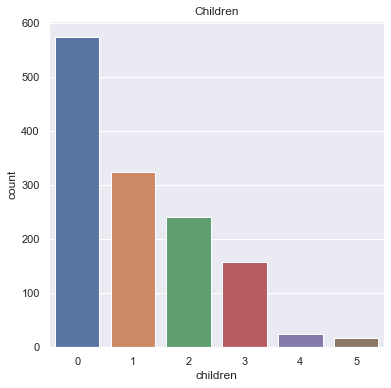

In [12]:
# Children Column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data = Insurance_dataset)
plt.title('Children')
plt.show()

In [13]:
Insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

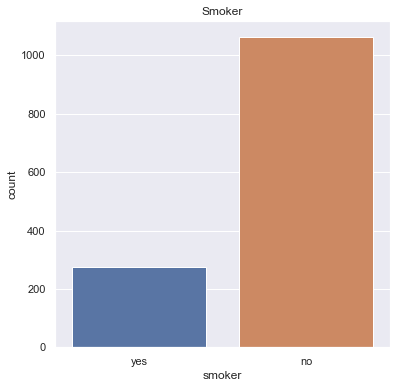

In [14]:
# Smoker Column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data = Insurance_dataset)
plt.title('Smoker')
plt.show()

In [15]:
Insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

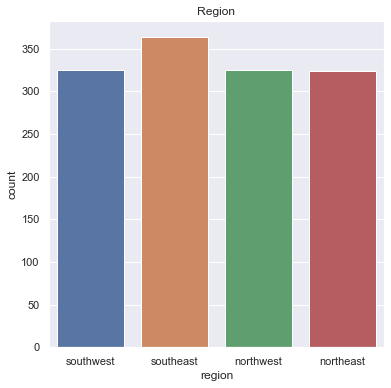

In [16]:
# Region Column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data = Insurance_dataset)
plt.title('Region')
plt.show()

In [17]:
Insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x432 with 0 Axes>

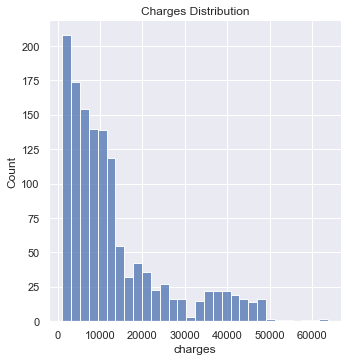

In [18]:
# Checking the Charges distribution 
plt.figure(figsize=(6,6))
sns.displot(Insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show

## Data Preprocessing 

* Encoding the Categorical Data

In [19]:
# Encoding the sex column
Insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)


# Encoding the smoker column
Insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

# Ecoding the region column

Insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace = True)

In [20]:
print(Insurance_dataset)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       0       1  16884.92400
1      18    0  33.770         1       1       0   1725.55230
2      28    0  33.000         3       1       0   4449.46200
3      33    0  22.705         0       1       3  21984.47061
4      32    0  28.880         0       1       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       1       3  10600.54830
1334   18    1  31.920         0       1       2   2205.98080
1335   18    1  36.850         0       1       0   1629.83350
1336   21    1  25.800         0       1       1   2007.94500
1337   61    1  29.070         0       0       3  29141.36030

[1338 rows x 7 columns]


## Splitting the Features and the Target

In [21]:
X = Insurance_dataset.drop('charges',axis=1)
Y = Insurance_dataset['charges']

In [22]:
print(X,Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns] 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


## Split the data into training and testing Data

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15,random_state=2)

In [24]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1137, 6) (201, 6)


## Model Training

* Linear Regression Model

In [25]:
model = LinearRegression()

In [26]:
# Loading the Linear Regression Model
model.fit(X_train,Y_train)

LinearRegression()

## Model Evaluation
* Using accuracy score

In [27]:
# Predicition on Training Data
training_data_prediction = model.predict(X_train)

In [28]:
# R squared Value
r2_train = metrics.r2_score(training_data_prediction,Y_train)

In [29]:
print('R squared Value: ',r2_train)

R squared Value:  0.6711681083953334


In [30]:
# Predicition on Testing Data
test_data_prediction = model.predict(X_test)

In [31]:
# R squared Value
r2_test = metrics.r2_score(test_data_prediction,Y_test)

In [32]:
print(r2_test)

0.6168265745057759


## Building a Predictive System

In [34]:
input_data = (62,1,26.29,0,0,0)
input_data_asarray = np.asarray(input_data)
reshape_data = input_data_asarray.reshape(1,-1)
prediction = model.predict(reshape_data)
print('The Medical Insurance Charges: ',prediction[0])

The Medical Insurance Charges:  35604.30093476627


C:\Users\devan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
